# Prostorska vizualizacija podatkov

Pri vizualizaciji podatkov se pogosto srečujemo z dimenzijskimi spremenljivkami, ki ustrezajo prostorsko-zemljepisnimi vrednostmi. Primer take spremenljivke je `drzava` za podatke, ki se nanašajo na več držav. Tudi `regija` za podatke, ki se nanašajo na Slovenijo. Vizualizacija takih podatkov je bolj nazorna, če podatke prikažemo na zemljevidu. Pogosto uporabljena estetska lastnost zemljevidov je barva: v statističnem diagramu državo ali regijo pobarvamo tako, da z intenziteto barve ponazorimo vrednost izbrane numerične ali diskretne spremenljivke.

Za prostorsko vizualizacijo podatkov s knjižnico `plotnine` uporabljamo geometrijski objekt [`geom_map`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_map.html). Ta geometrijski objekt rabi posebno podatkovno tabelo, kjer vsaka vrstica ustreza eni zemljepisni enoti (npr. državi, regiji ali občini). Vrednosti ene od spremenljivk v taki podatkovni tabeli, ki je običajno poimenovana `geometry`, definirajo poligone, ki definirajo robove (meje) za izris pripadajoče zemljepisne enote.

Zemljepisni podatki so običajno zbrani v okviru [geografskih informacijskih sistemov, GIS](https://en.wikipedia.org/wiki/Geographic_information_system). Področje GIS je široko in za uporabo podatkov GIS je potrebno veliko predznanja o različnih formatih zemljepisnih podatkov. Različne knjižnice nam omogočajo, da iz javno dostopnih GIS pridelamo poligone, ki orišejo zemljepisne enote v naših podatkih. Python-ovska knjižnica, ki nam omogoča delo s podatki GIS je [`geopandas`](https://geopandas.org/). Format zemljepisnih podatkov, ki ga bomo uporabljali za risanje prostorskih diagramov je [`shapefile`](https://en.wikipedia.org/wiki/Shapefile).

## Viri zemljepisnih podatkov

Poglejmo nekaj virov za pridobivanje javno dostopnih zemljepisnih podatkov:

* [Natural Earth Data](https://www.naturalearthdata.com/downloads/) ponuja zemljepisne podatke za svet. Podatki so v treh resolucijah, 10, 50 in 110 metrov. Za nas so še posebej zanimivi podatki tipa `Cultural`, ki definirajo poligone za zemljepisne enote, ki ustrezajo državam sveta. Format podatkov je zgoraj omenjeni `shapefile`. V tem zvezku uporabljamo [kopijo podatkov](https://kt.ijs.si/~ljupco/lectures/papvp-2324/shp/ned/), ki smo jih prenesli decembra 2023.

* [Portal e-prostor](https://ipi.eprostor.gov.si/jgp/data) ponuja podatke za različne zemljepisne enote v Sloveniji (regije, občine, volilne enote in podobno). Format podatkov je zgoraj omenjeni `shapefile`. V tem zvezku uporabljamo [kopijo podatkov](https://kt.ijs.si/~ljupco/lectures/papvp-2324/shp/eprostor/), ki smo jih prenesli decembra 2023.

* [Portal Eurostat](https://ec.europa.eu/eurostat/web/nuts/background) ponuja podatke za zemljepisne enote v Evropi, države in regije. Podatki so na voljo v različnih formatih, v formatu `shapefile`, so dostopni [tukaj](https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts). V tem zvezku uporabljamo [kopijo podatkov](https://kt.ijs.si/~ljupco/lectures/papvp-2324/shp/nuts/), ki smo jih prenesli decembra 2023.

## Zemljepis sveta in Evrope

Poglejmo najprej podatke, ki jih ponuja portal Natural Earth Data. Za prebiranje podatkov v formatu `shapefile` uporabimo funkcijo [`read_file`](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html) knjižnice `geopandas`:

In [1]:
import pandas as pd
import geopandas as gp
import plotnine as p9

gp_svet = gp.read_file("https://kt.ijs.si/~ljupco/lectures/papvp-2324/shp/ned/10m/ne_10m_admin_0_countries.shp")
gp_svet

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,None,None,None,None,None,None,None,None,None,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


Rezultat funkcije `read_file` je torej podatkovna tabela (tipa `DataFrame` knjižnice `pandas`). V tem primeru ima tabela 258 vrstic, ki ustrezajo vsem administrativnim enotam sveta. Večina teh je suverenih držav, kakšne so zgolj administrativna območja brez dokončnega mednarodnega statusa. Izpis zgoraj kaže nekaj od 169 spremenljivk podatkovne tabele.

Za izris administrativnih enot je ključna zadnja spremenljivka `geometry`. To spremenljivko uporabi geometrijski objekt `geom_map` knjižnice `plotnine`. Poglejmo osnovni izris te podatkovne tabele:

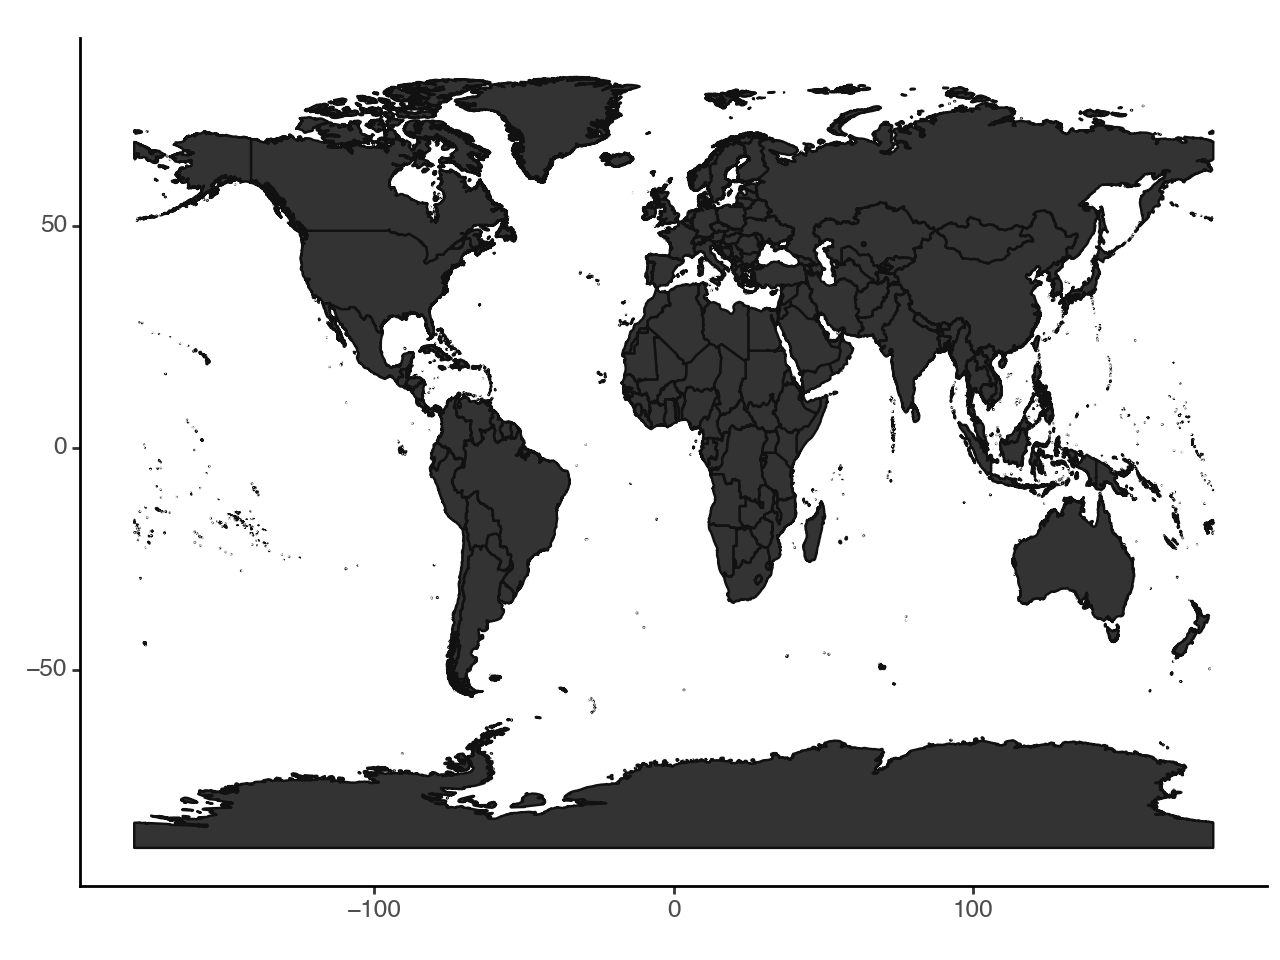

<Figure Size: (640 x 480)>

In [2]:
(
    p9.ggplot(gp_svet) +
    p9.geom_map() +
    p9.theme_classic()
)

Poglejmo pregled stolpcev podatkovne tabele `gp_svet`:

In [3]:
print(gp_svet.columns.to_list())

['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A3_VN', 'ADM0_A3_TR', 'AD

Nekaj stolpcev (spremenljivk) te tabele je ključnih za nadaljnjo uporabo:

* `NAME` je ime države oziroma administrativne enote.
* `CONTINENT` je ime celine, kamor pripada opazovana administrativna enota.
* `ISO_A2` in `ISO_A3` sta kratici (dve črkovna in tri črkovna) [ISO](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) opazovane administrativne enote.
* Spremenljivke s predpono `MAPCOLOR` ponujajo smiselno številčenje držav za barvanje mape tako, da sosednje države so čim bolj kontrastnih barv. Vrednosti spremenljivk so celoštevilčne, pred uporabo jih moramo sami poskrbeti za njihovo pretvorbo v kategorije (spodaj je primer).
* `geomety` vsebuje definicije poligonov, s katerimi izrišemo obrobo izbrane administrativne enote.

Poglejmo:

In [4]:
gp_svet.loc[:, ["NAME", "CONTINENT", "ISO_A3", "ISO_A2", "MAPCOLOR7", "geometry"]]

,NAME,CONTINENT,ISO_A3,ISO_A2,MAPCOLOR7,geometry
0,Indonesia,Asia,IDN,ID,6,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,Asia,MYS,MY,2,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,South America,CHL,CL,5,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,South America,BOL,BO,1,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,South America,PER,PE,4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...
253,Macao,Asia,MAC,MO,4,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
254,Ashmore and Cartier Is.,Oceania,-99,-99,1,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Bajo Nuevo Bank,North America,-99,-99,3,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Serranilla Bank,North America,-99,-99,3,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


Pred nadaljnjo uporabo popravimo tip spremenljivke `MAPCOLOR7` v kategorijo:

In [5]:
gp_svet.MAPCOLOR7 = gp_svet.MAPCOLOR7.astype('category')

Narišimo zdaj zemljevid sveta, kjer administrativne enote pobarvamo tako, da bodo barve držav ustrezale celini. Zato uporabimo estetsko lastnost `fill` geometrijskega objekta `geom_map` tako, kot smo se učili na predavanjih o vizualizaciji podatkov:

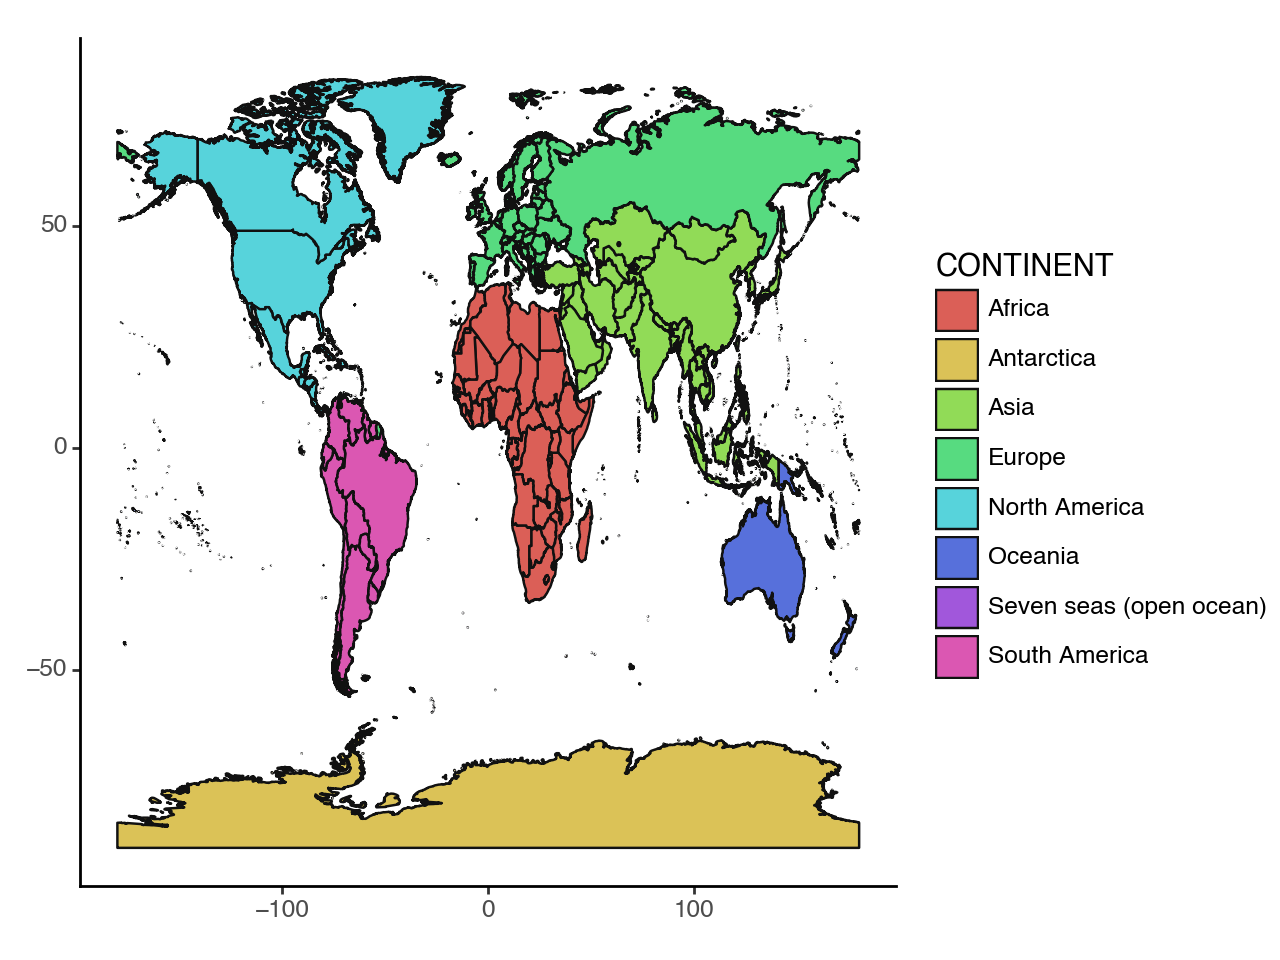

<Figure Size: (640 x 480)>

In [6]:
(
    p9.ggplot(gp_svet) +
    p9.aes(fill = "CONTINENT") +
    p9.geom_map() +
    p9.theme_classic()
)

Narišimo zdaj mapo Evrope. To dosežemo tako, da iz podatkovne tabele `gp_svet` izberemo tiste vrstice, kjer je vrednost spremenljivke `CONTINENT` enaka `Europe`. Za barvanje administrativnih enote tokrat izberemo spremenljivko `MAPCOLOR7`:

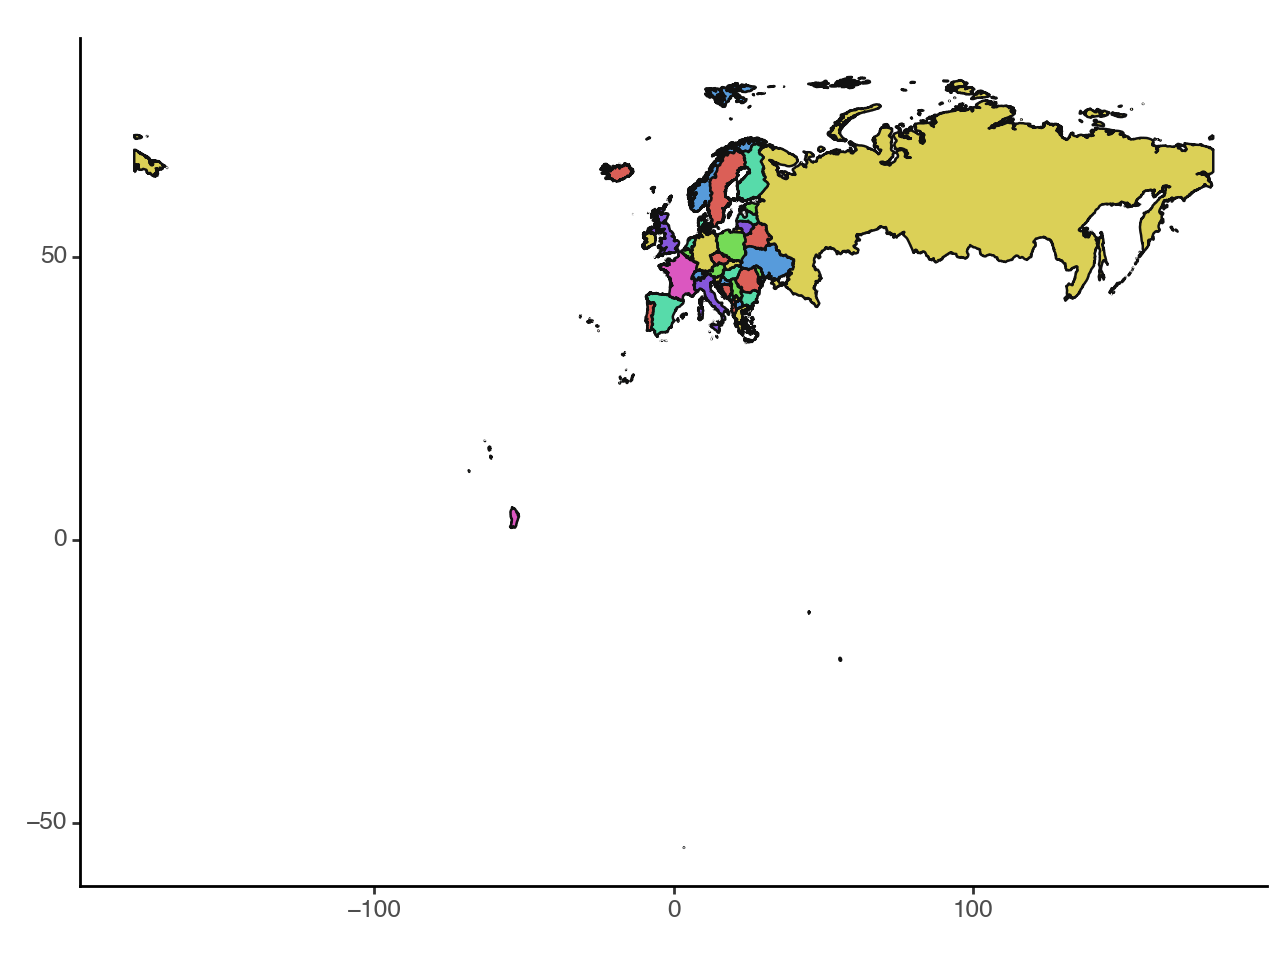

<Figure Size: (640 x 480)>

In [7]:
gp_evropa = gp_svet.loc[gp_svet.CONTINENT == "Europe", :]

(
    p9.ggplot(gp_evropa) +
    p9.aes(fill = "MAPCOLOR7") +
    p9.geom_map() +
    p9.guides(fill = None) +
    p9.theme_classic()
)

Vidimo, da je Evropa široko raztegnjena čez celotni zemljevid sveta. Z uporabo funkcij `xlim` in `ylim` lahko ustrezno zožimo obseg zemljevida na _celinsko_ Evropo takole:

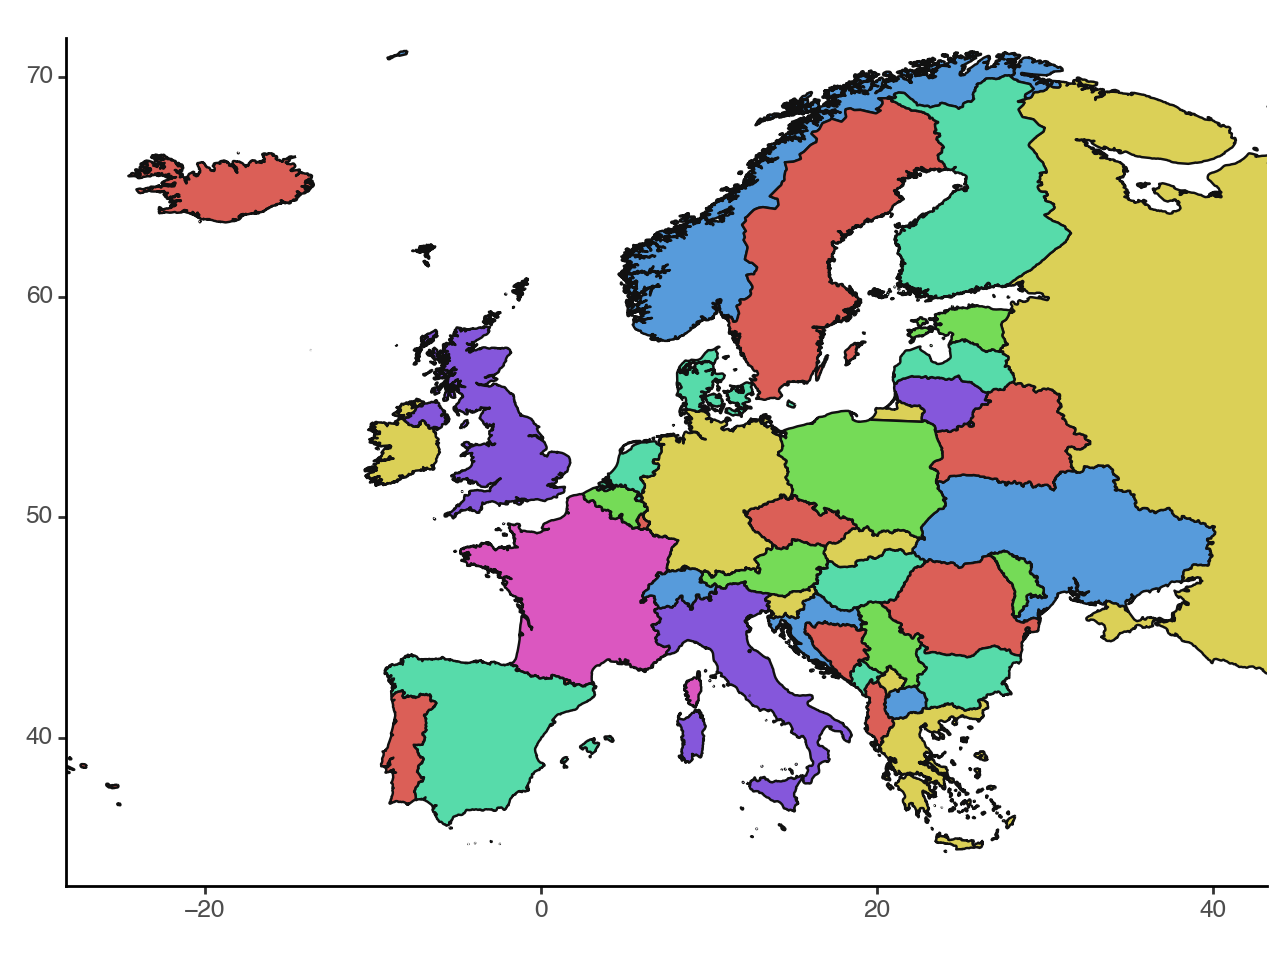

<Figure Size: (640 x 480)>

In [8]:
(
    p9.ggplot(gp_evropa) +
    p9.aes(fill = "MAPCOLOR7") +
    p9.geom_map() +
    p9.guides(fill = None) +
    p9.xlim(-25, 40) +
    p9.ylim(35, 70) +
    p9.theme_classic()
)

Poglejmo zdaj, kako na zemljevidu dodamo administrativnim enotam dve črkovni kratici ISO. Pripravimo najprej podatkovno tabelo s tremi spremenljivkami. Prvi dve sta `x` in `y` koordinati centralne točke (centroida) poligonov, ki omejujejo državo, tretja spremenljivka je `ime`, katere vrednost je enaka dve črkovna kratica ISO za državo. Pri tem uporabimo atribut [`centroid`](https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html#GeoSeries.centroid) spremenljivke `geometry`:

In [9]:
centroid_ime = pd.DataFrame({
    "x": gp_evropa.geometry.centroid.x,
    "y": gp_evropa.geometry.centroid.y,
    "ime": gp_evropa.ISO_A2
})

centroid_ime

/var/folders/g7/xgt9ckmj6g1404knwg8j5rkc0000gn/T/ipykernel_8937/891285855.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/var/folders/g7/xgt9ckmj6g1404knwg8j5rkc0000gn/T/ipykernel_8937/891285855.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



,x,y,ime
21,-2.755221,42.180107,-99
33,31.255306,49.160078,UA
34,28.033567,53.531880,BY
43,23.888249,55.327024,LT
47,96.627588,61.966853,RU
48,15.314103,49.732448,CZ
49,10.381494,51.106364,DE
50,25.535793,58.671014,EE
51,24.908622,56.851819,LV
52,15.409599,68.794273,-99


Zdaj lahko narišemo dvoplastni diagram. Prva plast uporablja geometrijski objekt `geom_map` in podatkovna tabela `gp_evropa` zato, da nariše zemljevid Evropski držav, kot je pokazal prejšnji primer. Druga plast uporablja ravnokar pripravljeno podatkovno tabelo `centorid_ime` in geometrijski objekt `geom_text` zato, da na zemljevid postavimo oznake posameznih administrativnih enot:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


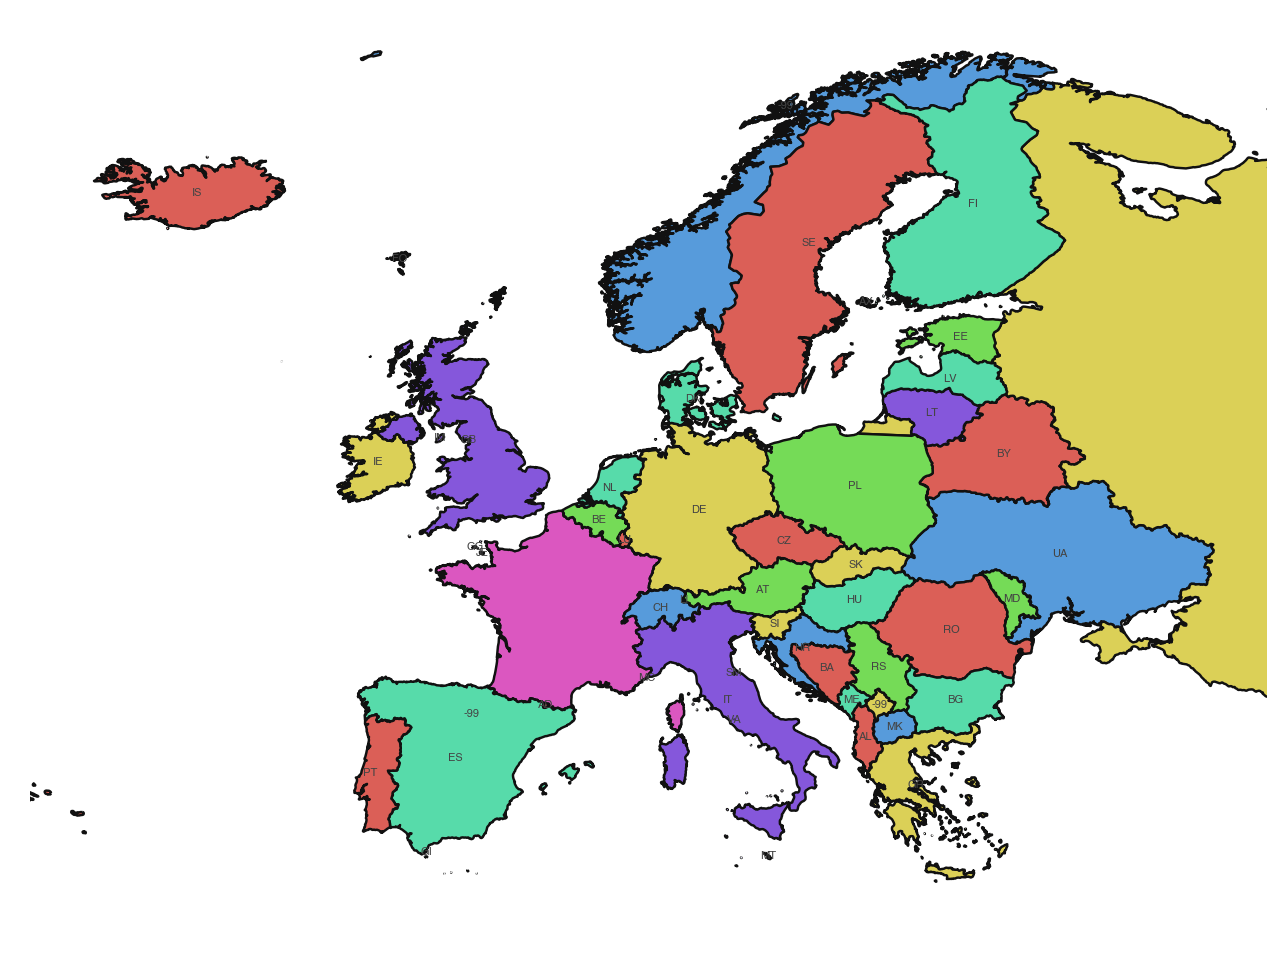

<Figure Size: (640 x 480)>

In [10]:
(
    p9.ggplot() +
    p9.geom_map(
        data = gp_evropa,
        mapping = p9.aes(
            fill = "MAPCOLOR7"
        )
    ) +
    p9.guides(fill = None) +
    p9.xlim(-25, 40) +
    p9.ylim(35, 70) +
    p9.geom_text(
        data = centroid_ime,
        mapping = p9.aes(
            x = "x",
            y = "y",
            label = "ime"
        ),
        size = 4,
        color = "#444444"
    ) +
    p9.theme_void()
)

V naslednjem podpoglavju bomo države pobarvali tako, da bo barva ustrezala letni povprečni temperaturi zraka.

## Mapa povprečnih temperatur zraka za Evropske države

Pripravimo najprej podatkovno tabelo s povprečnimi letnimi temperaturami zraka v državah sveta. V ta namen uporabimo podatke, ki jih ponuja članek [List of countries by average yearly temperature](https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature) splete enciklopedije Wikipedia:

In [11]:
tabele = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature")
temp_svet = tabele[0]

temp_svet

,Country,Average yearly temperature (1961–1990 Celsius)
0,Burkina Faso,28.29
1,Mali,28.25
2,Kiribati,28.20
3,Djibouti,28.00
4,Maldives,28.00
...,...,...
187,Finland,01.55
188,Norway [note 2],01.50
189,Iceland,−0.70
190,Canada,−5.10


Dobimo torej tabelo z dvema spremenljivkama, `Country` je dimenzijska spremenljivka, ki imenuje državo, in `Average yearly temperature (1961–1990 Celsius)`. Tip slednje je napačen: niz znakov namesto numerični:

In [12]:
temp_svet.dtypes

Country                                           object
Average yearly temperature (1961–1990 Celsius)    object
dtype: object

Poenostavimo imeni spremenljivk in popravimo tip druge spremenljivke:

In [13]:
temp_svet.columns = ["country", "avg_temp"]
temp_svet.avg_tem = temp_svet.avg_temp.astype("float")

ValueError: could not convert string to float: '−0.70'

Težava je v tem, da je predznak `-` v vrednostih spremenljivke `avg_temp` je zapisan z znakom Unicode [`−`](https://www.compart.com/en/unicode/U+2212), ki ga Python ne razume in ne interpretira kot operator `-`. To rešimo tako, da na spremenljivki `avg_temp` uporabimo funkcijo `replace` zato, da vse znake `−` zamenjamo z navadnim znakom `-`:

In [14]:
temp_svet.avg_temp = temp_svet.avg_temp.replace("−", "-", regex = True)
temp_svet["avg_temp"] = temp_svet.avg_temp.astype("float")

Prepričajmo se, da so tipi spremenljivk v podatkovni tabeli zdaj pravilni:

In [15]:
temp_svet.dtypes

country      object
avg_temp    float64
dtype: object

Zdaj lahko uporabimo podatkovno tabelo `gp_evropa`, ki smo jo pripravili v prejšnjem razdelku. Tukaj jo bomo združili s podatkovno tabelo s povprečnimi temperaturami:

In [16]:
temp_evropa = gp_evropa.merge(temp_svet, how = "left", left_on = "NAME", right_on = "country")

Ter narisali tako, da bomo definirali estetsko preslikavo, ki povprečno letno temperaturo prelika v barvo zemljepisne enote `fill`:

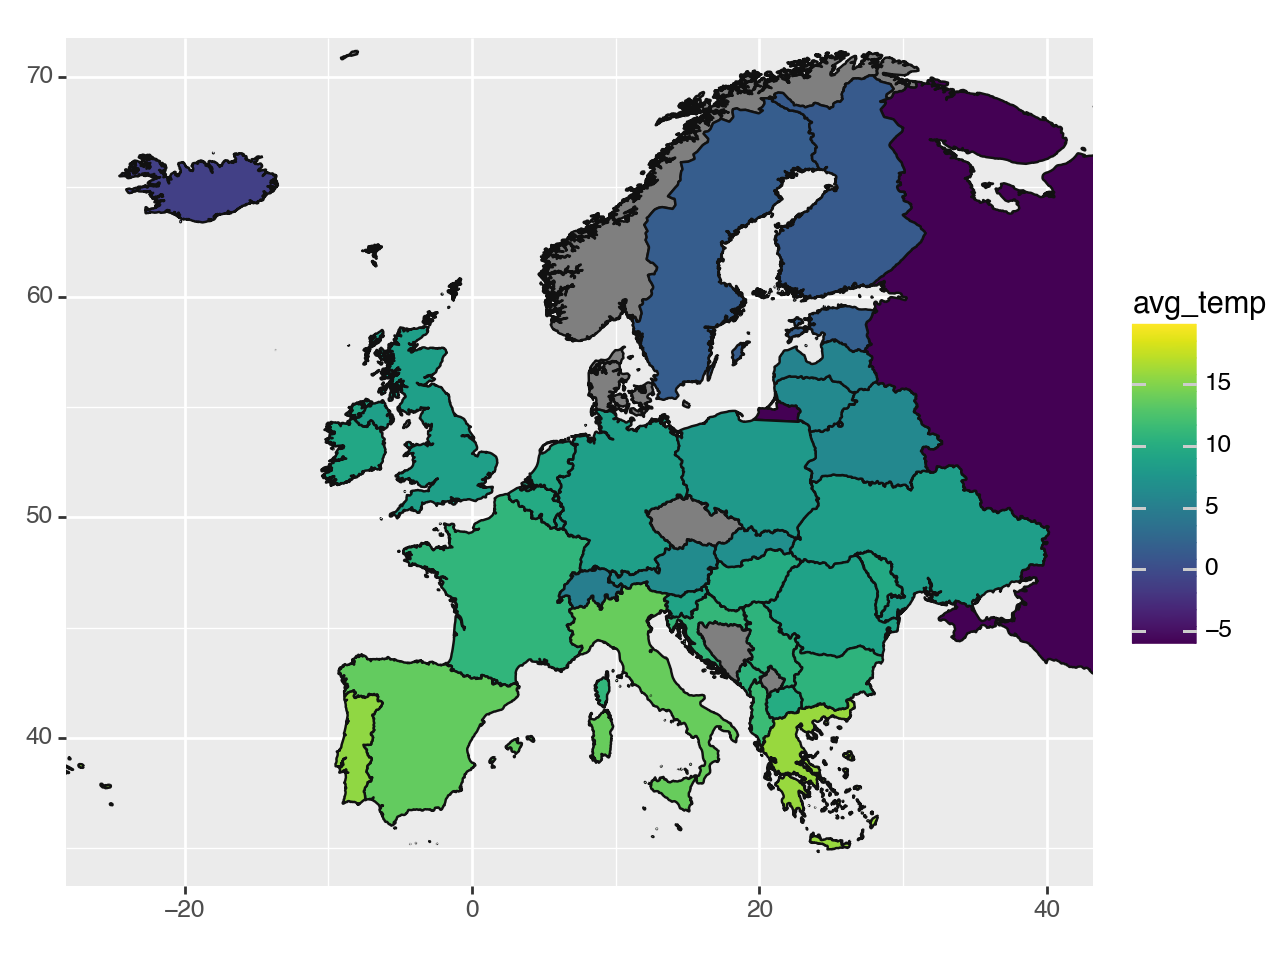

<Figure Size: (640 x 480)>

In [17]:
(
    p9.ggplot(temp_evropa) +
    p9.aes(
        fill = "avg_temp"
    ) +
    p9.xlim(-25, 40) +
    p9.ylim(35, 70) +
    p9.geom_map()
)

Opažamo, da nekaj administrativnih enot (Norveška, Danska, Češka, Bosna in Hercegovina ter Kosovo) so ostale brez ustrezne barve. Preverimo zakaj. Norveška in Danska so v tabeli, ki smo jo prenesli iz spletne enciklopedije Wikipedia, navedene z opombo v oglatih oklepajih. Zato bomo najprej iz stolpca `contry` odstranili opombe v oglatih oklepajih: pri tem bomo uporabili regularni izraz `" \[.*\]"`. Nadalje, lahko opazimo, da imena Bosne in Hercegovine ter Češke so različno navedena v obeh tabelah, zato bomo popravili njihovi imeni v tabeli `gp_evropa`. Nazadnje, lahko ugotovimo, da tabela s povprečnimi temperaturami ne vsebuje podatkov o Kosovu:

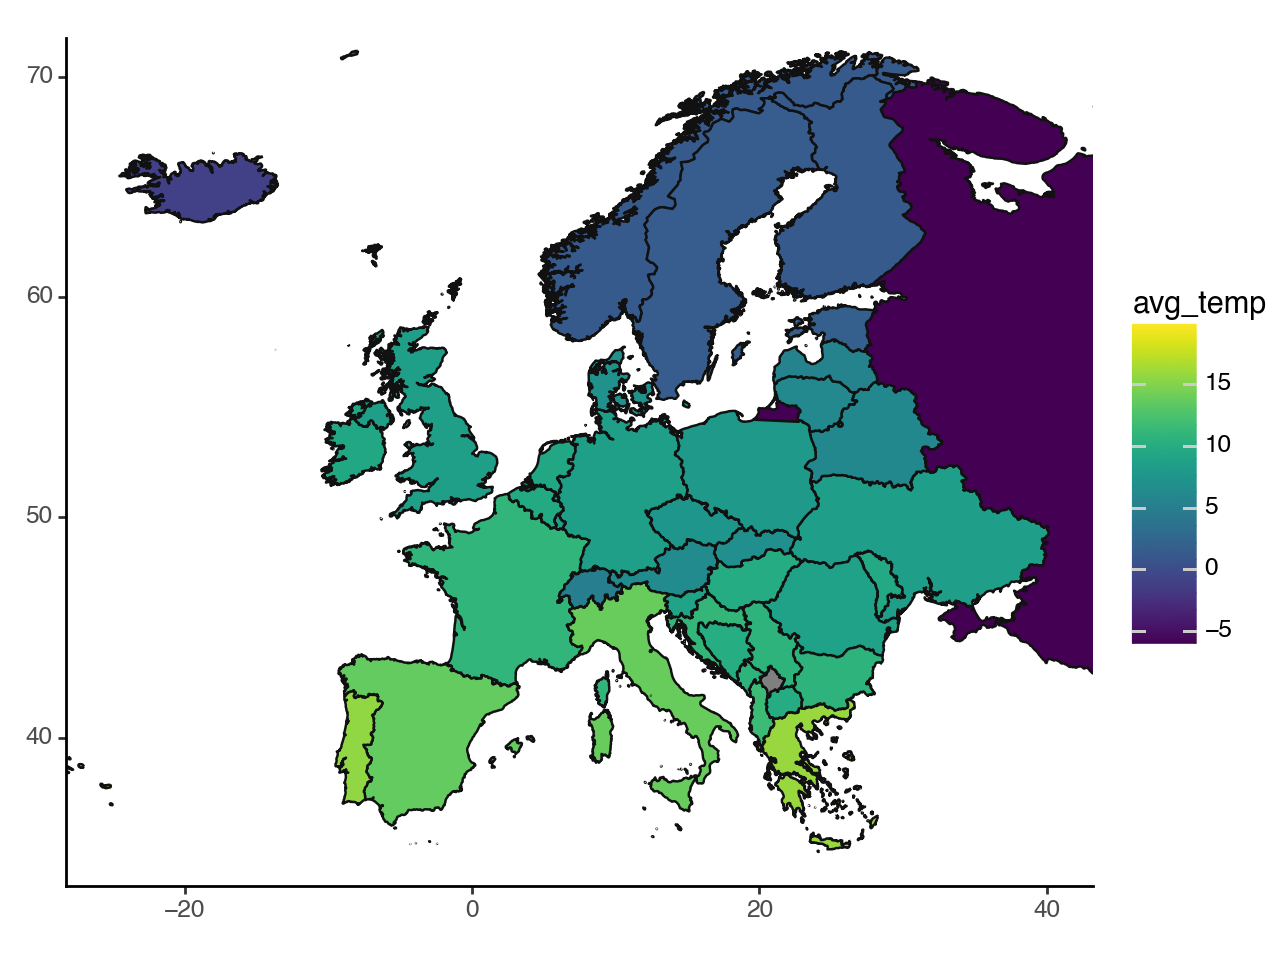

<Figure Size: (640 x 480)>

In [18]:
temp_svet.loc[:, "country"] = temp_svet.country.replace(r" \[.*\]", "", regex = True)
gp_evropa.loc[:, "NAME"] = gp_evropa.NAME.replace("Bosnia and Herz.", "Bosnia and Herzegovina")
gp_evropa.loc[:, "NAME"] = gp_evropa.NAME.replace("Czechia", "Czech Republic")

temp_evropa = gp_evropa.merge(temp_svet, how = "left", left_on = "NAME", right_on = "country")

(
    p9.ggplot(temp_evropa) +
    p9.aes(
        fill = "avg_temp"
    ) +
    p9.xlim(-25, 40) +
    p9.ylim(35, 70) +
    p9.geom_map() +
    p9.theme_classic()
)

Za vajo popravi zgornji diagram tako, da spremeniš naslov legende "avg_temp".

## Zemljevidi administrativnih enot Slovenije

Poglejmo zdaj uporabo podatkov o slovenskih administrativnih enotah iz portala e-prostor. Preberimo najprej podatke o statističnih regijah:

In [19]:
slo_regije = gp.read_file("https://kt.ijs.si/~ljupco/lectures/papvp-2324/shp/eprostor/stat-regije/RPE_SLO_PROSTORSKE_ENOTE_STATISTICNE_REGIJE_poligon.shp")
slo_regije

,FEATUREID,EID_STATIS,SIFRA,NAZIV,DATUM_SYS,NAZIV_DJ,geometry
0,STATISTICNE_REGIJE.110900000214281675,110900000214281675,3,Koroška,2023-10-06,None,"POLYGON ((516913.870 138847.370, 516838.310 13..."
1,STATISTICNE_REGIJE.110900000214281832,110900000214281832,5,Zasavska,2023-10-06,None,"POLYGON ((506409.350 104183.540, 506417.620 10..."
2,STATISTICNE_REGIJE.110900000214281329,110900000214281329,1,Pomurska,2023-10-06,None,"POLYGON ((572368.450 161457.150, 572366.590 16..."
3,STATISTICNE_REGIJE.110900000214282301,110900000214282301,10,Primorsko-notranjska,2023-10-06,None,"POLYGON ((428959.670 42240.640, 428964.170 422..."
4,STATISTICNE_REGIJE.110900000214282483,110900000214282483,11,Goriška,2023-10-06,None,"POLYGON ((393669.030 88317.310, 393674.210 883..."
5,STATISTICNE_REGIJE.110900000214281592,110900000214281592,2,Podravska,2023-10-06,None,"POLYGON ((530520.910 138137.010, 530524.400 13..."
6,STATISTICNE_REGIJE.110900000214281758,110900000214281758,4,Savinjska,2023-10-06,None,"POLYGON ((530760.290 137967.880, 530776.060 13..."
7,STATISTICNE_REGIJE.110900000214281915,110900000214281915,6,Posavska,2023-10-06,None,"POLYGON ((529250.230 79385.060, 529254.760 793..."
8,STATISTICNE_REGIJE.110900000214282137,110900000214282137,8,Osrednjeslovenska,2023-10-06,None,"POLYGON ((442617.150 79895.390, 442566.670 798..."
9,STATISTICNE_REGIJE.110900000214282210,110900000214282210,9,Gorenjska,2023-10-06,None,"POLYGON ((433189.780 96482.330, 433189.510 964..."


Podatkovna tabela torej vsebuje podatke o dvanajstih statističnih regij Slovenije. Narišimo njihov zemljevid:

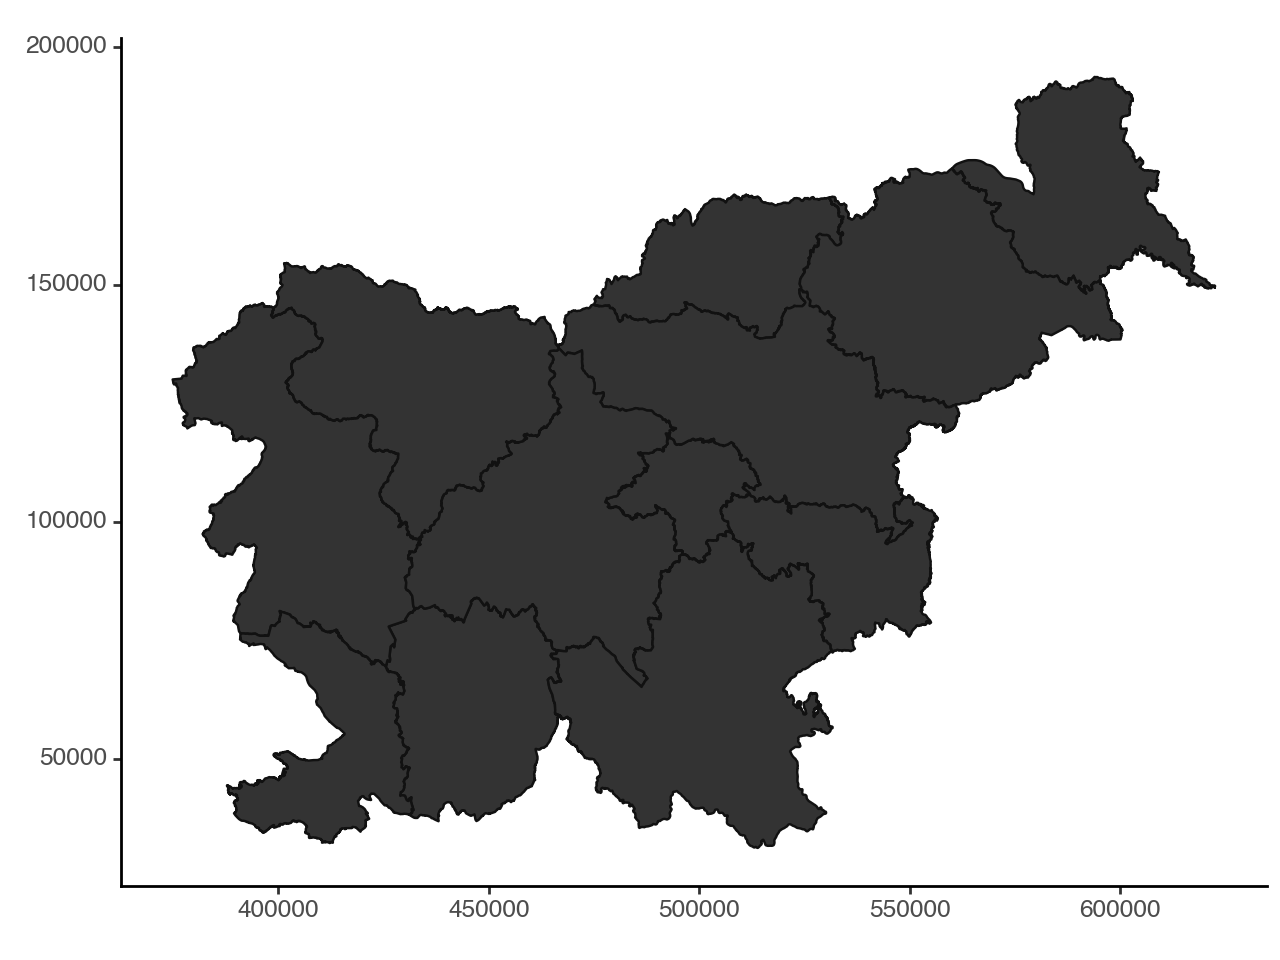

<Figure Size: (640 x 480)>

In [20]:
(
    p9.ggplot(slo_regije) +
    p9.geom_map() +
    p9.theme_classic()
)

Dodajmo barve in oznake, tako kot pri zemljevidu Evrope:

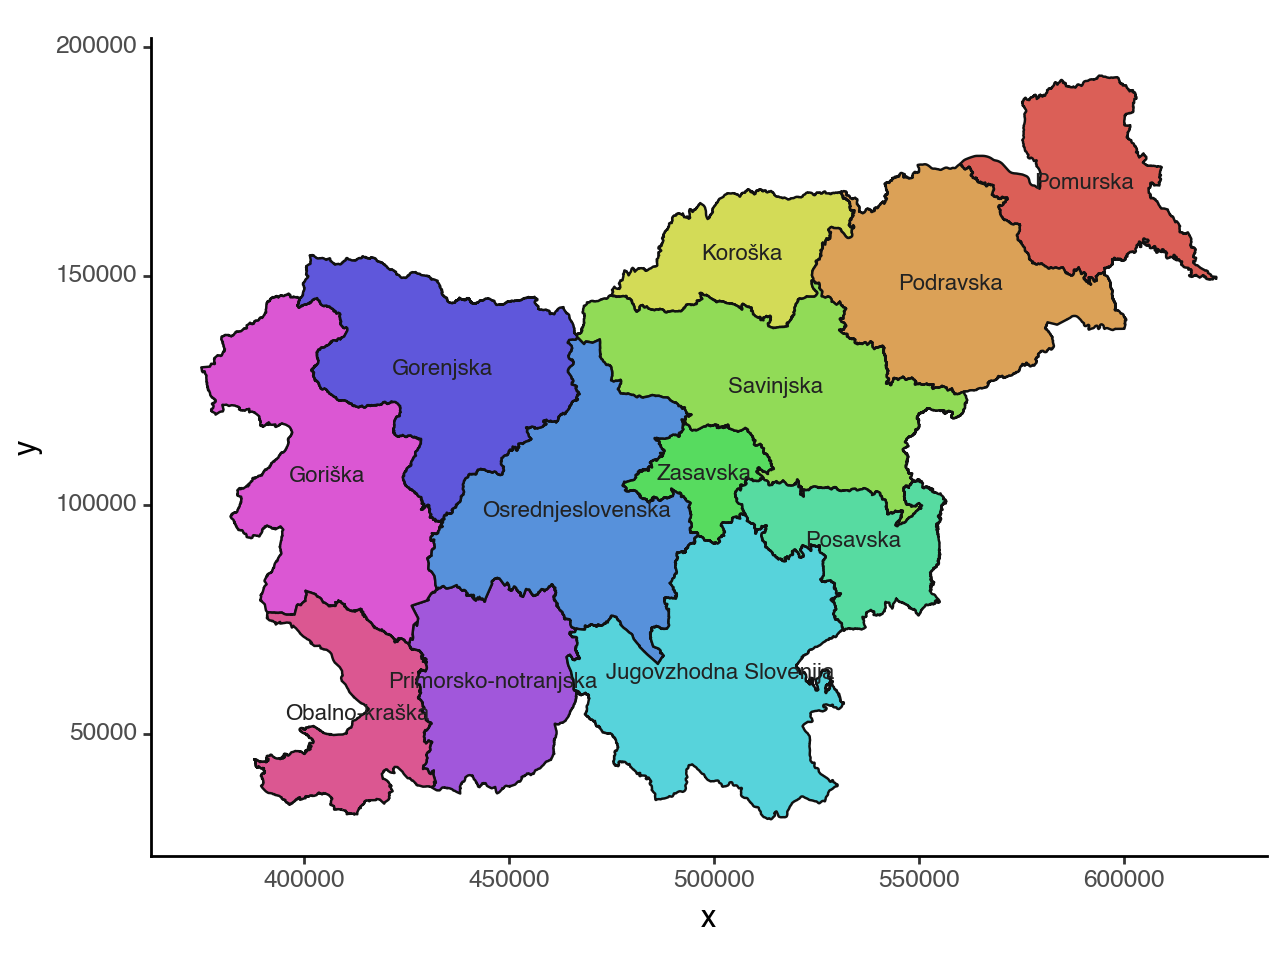

<Figure Size: (640 x 480)>

In [21]:
centorid_ime_regije = pd.DataFrame({
    "x": slo_regije.geometry.centroid.x,
    "y": slo_regije.geometry.centroid.y,
    "ime": slo_regije.NAZIV
})
slo_regije.SIFRA = slo_regije.SIFRA.astype("category")

(
    p9.ggplot() +
    p9.geom_map(
        data = slo_regije,
        mapping = p9.aes(
            fill = "SIFRA"
        )
    ) +
    p9.guides(fill = None) +
    p9.geom_text(
        data = centorid_ime_regije,
        mapping = p9.aes(
            x = "x",
            y = "y",
            label = "ime"
        ),
        size = 8,
        color = "#222222"
    ) +
    p9.theme_classic()
)

Preberimo zdaj še podatke o statističnih regijah:

In [22]:
slo_obcine = gp.read_file("https://kt.ijs.si/~ljupco/lectures/papvp-2324/shp/eprostor/obcine/RPE_SLO_PROSTORSKE_ENOTE_OBCINE_poligon.shp")
slo_obcine

,FEATUREID,EID_OBCINA,SIFRA,NAZIV,OZNAKA_MES,DATUM_SYS,NAZIV_DJ,geometry
0,OBCINE.110200000110281016,110200000110281016,143,Zavrč,0,2023-06-06,None,"POLYGON ((579225.460 138876.780, 579267.400 13..."
1,OBCINE.110200000110281289,110200000110281289,146,Železniki,0,2023-06-06,None,"POLYGON ((430515.060 114887.380, 430491.690 11..."
2,OBCINE.110200000110267882,110200000110267882,25,Dravograd,0,2023-06-06,None,"POLYGON ((495724.740 161303.880, 495693.070 16..."
3,OBCINE.110200000110268344,110200000110268344,30,Gornji Grad,0,2023-06-06,None,"POLYGON ((481459.630 131780.380, 481496.710 13..."
4,OBCINE.110200000110269078,110200000110269078,37,Ig,0,2023-06-06,None,"POLYGON ((458682.950 86331.980, 458677.310 863..."
...,...,...,...,...,...,...,...,...
207,OBCINE.110200000110280554,110200000110280554,99,Radeče,0,2023-06-06,None,"POLYGON ((515804.630 102246.420, 515827.040 10..."
208,OBCINE.110200000110280638,110200000110280638,135,Videm,0,2023-06-06,None,"POLYGON ((566374.510 138795.960, 566384.710 13..."
209,OBCINE.110200000110280711,110200000110280711,137,Vitanje,0,2023-06-06,None,"POLYGON ((517804.050 139748.070, 517862.600 13..."
210,OBCINE.110200000110280802,110200000110280802,139,Vojnik,0,2023-06-06,None,"POLYGON ((519680.710 130133.340, 519669.450 13..."


Podatkovna tabela ponuja podatke za 212 občin. Narišimo in preverimo:

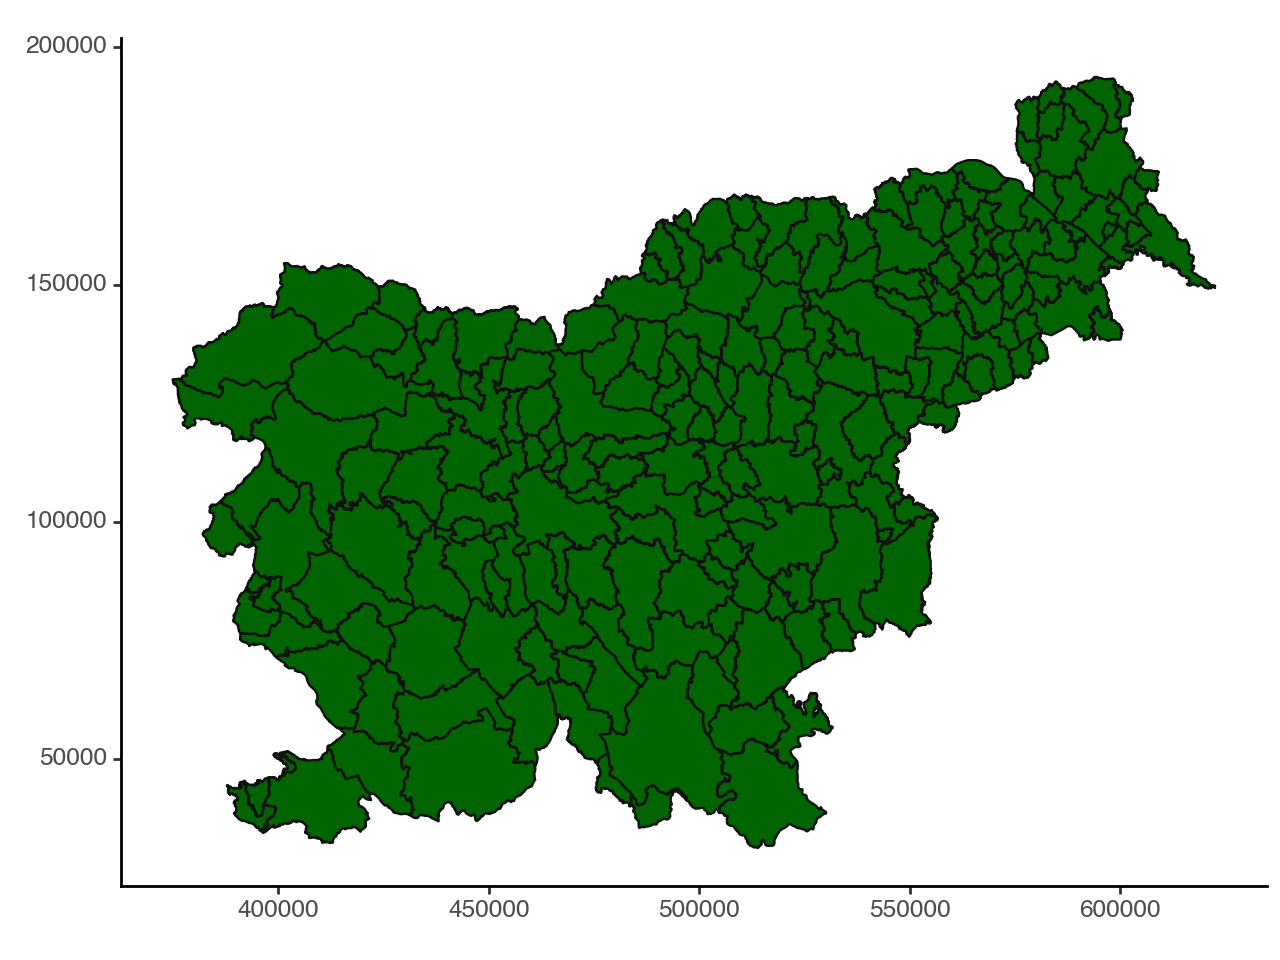

<Figure Size: (640 x 480)>

In [23]:
(
    p9.ggplot(slo_obcine) +
    p9.geom_map(fill = "darkgreen") +
    p9.theme_classic()
)

## Naloge

1. Nariši statistični diagram z zemljepisom Slovenije in njenih štirih sosednjih držav. Pobarvaj države z različnimi barvami. Posamezno državo označi z njenim imenom: oznake postavi v centralne toče ustreznih zemljepisnih enot.

    Za vsako države na tem zemljevidu preveri, če podatki Eurostat o evropskih regijah vključujejo regije države. Če so podatki o regijah na voljo, zgornjemu zemljevidu dodaj novo plast, ki ponazori regije držav.

2. Zadnji zemljevid Slovenije s predavanj, ki vsebuje oznake njenih statističnih regij, pobarvaj tako, da bo barva regije ponazorila število prebivalcev v regiji. Spreminjaj barve regij in oznak toliko časa, da bo diagram čim bolj berljiv v smislu vidnosti oznak in vidnosti razlik med številom prebivalcev v regijah.